In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [3]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [4]:
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
XN,YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)
overdose = augmented
overdose.columns = {title}
overdose


,Heroin Overdoses
1999.0,1960.0
1999.1,1948.2
1999.2,1936.4
1999.3,1924.6
1999.4,1912.8
1999.5,1901.0
1999.6,1889.2
1999.7,1877.4
1999.8,1865.6
1999.9,1853.8


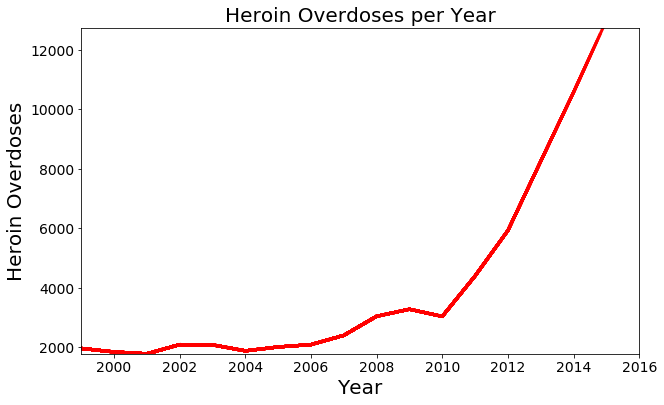

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=len(overdose[title])/2, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

def animate(j):
    data = overdose.iloc[:int(j+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data = data, color="r")
    p.tick_params(labelsize=14)
    plt.setp(p.lines,linewidth=3)
    

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(overdose[title]), repeat=True)
ani.save('HeroinOverdosesAugmented.gif', writer='imagemagick', fps=50)